In [4]:
# this code evolved into a sandbox. 

# 2011, 2014, 2018 new goal

import matplotlib.pyplot as plt
import numpy as np

In [17]:
import pandas as pd
import scipy.stats as stats

In [7]:
data_df = pd.read_csv("../Resources/College_Raw_Data/MERGED2018_19_PP.csv", low_memory=False)
#data_df.head()


# Passing in the cleaned data dictionary for variables in non-empty columns in the 2018-19 data
data_dictionary_df = pd.read_csv("../Resources/data_dictionary_clean.csv", low_memory=False)
data_dictionary_df.head()

,Unnamed: 0,NAME OF DATA ELEMENT,dev-category,NOTES
0,UNITID,Unit ID for institution,root,Shown/used on consumer website.
1,OPEID,8-digit OPE ID for institution,root,Shown/used on consumer website.
2,OPEID6,6-digit OPE ID for institution,root,Shown/used on consumer website.
3,INSTNM,Institution name,school,Shown/used on consumer website.
4,CITY,City,school,Shown/used on consumer website.


In [8]:
variable_series = data_dictionary_df["Unnamed: 0"]
variable_series


0                        UNITID
1                         OPEID
2                        OPEID6
3                        INSTNM
4                          CITY
                 ...           
619                     SCUGFFN
620          POOLYRS_FTFTAIDPCT
621     FTFTPCTPELL_POOLED_SUPP
622    FTFTPCTFLOAN_POOLED_SUPP
623              SCUGFFN_POOLED
Name: Unnamed: 0, Length: 624, dtype: object

0       0.182
1       0.057
2       0.110
3       0.059
4       0.203
        ...  
6799    0.188
6800    0.188
6801    0.188
6802    0.188
6803    0.483
Name: CDR3, Length: 5879, dtype: float64


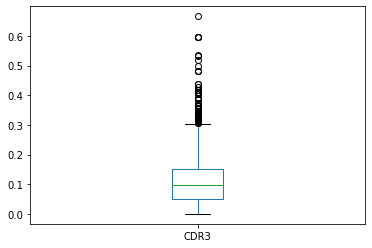

In [9]:
loan_default_series = data_df['CDR3'].dropna()

print(loan_default_series)

loan_default_series.plot.box()

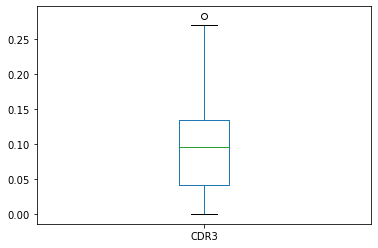

In [10]:
wa_default_series = data_df.loc[data_df['STABBR'] == 'WA' , :]['CDR3']

#print(wa_default_series)

wa_default_series = wa_default_series.dropna()

wa_default_series.plot.box()

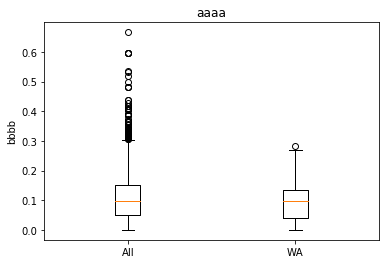

In [11]:
default_dict = {"All": loan_default_series.to_list(), "WA": wa_default_series.to_list()}

fig, ax = plt.subplots()
ax.set_title('aaaa')
ax.set_ylabel('bbbb')

ax.boxplot(default_dict.values())
ax.set_xticklabels(default_dict.keys())

plt.show()

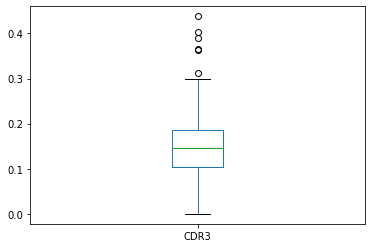

In [12]:
two_year_default_series = data_df.loc[data_df['HIGHDEG'] == 2 , :]['CDR3']

#print(wa_default_series)

two_year_default_series = two_year_default_series.dropna()

two_year_default_series.plot.box()

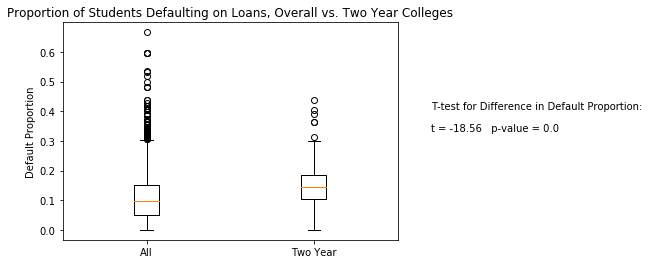

In [19]:
default_dict = {"All": loan_default_series.to_list(), "Two Year": two_year_default_series.to_list()}

fig, ax = plt.subplots()
ax.set_title('Proportion of Students Defaulting on Loans, Overall vs. Two Year Colleges')
ax.set_ylabel('Default Proportion')

ax.boxplot(default_dict.values())
ax.set_xticklabels(default_dict.keys())

test = stats.ttest_ind(loan_default_series.to_list(), two_year_default_series.to_list(), equal_var=False)
ax.annotate("T-test for Difference in Default Proportion:",xy=(1.1, 0.6) , xycoords='axes fraction' , xytext=(1.1, 0.6)) 
ax.annotate(f"t = {test.statistic.round(2)}   p-value = {test.pvalue.round(4)}", xy=(1.1, 0.5) , xycoords='axes fraction' , xytext=(1.1, 0.5))# , arrowprops= )


plt.savefig("../visualize/two_vs_overall_default.png", bbox_inches="tight")




plt.show()

In [33]:
default_sorted_df = data_df.sort_values("CDR3")

default_sorted_df.head()["HIGHDEG"]

3069    3
4325    4
6381    0
2412    3
1608    3
Name: HIGHDEG, dtype: int64

In [ ]:
# master branch ZIP codes